In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np

In [3]:
df = pd.read_csv('irctc.csv')

In [4]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
print(df)

         Date  Waiting-List-No
0  2023-10-14              110
1  2023-10-18              102
2  2023-10-20               97
3  2023-10-22               88
4  2023-10-24               87
5  2023-10-27               85
6  2023-10-28               81
7  2023-10-31               79
8  2023-11-01               77
9  2023-11-03               76
10 2023-11-04               69
11 2023-11-05               63
12 2023-11-06               56
13 2023-11-07               53
14 2023-11-08               51
15 2023-11-09               49


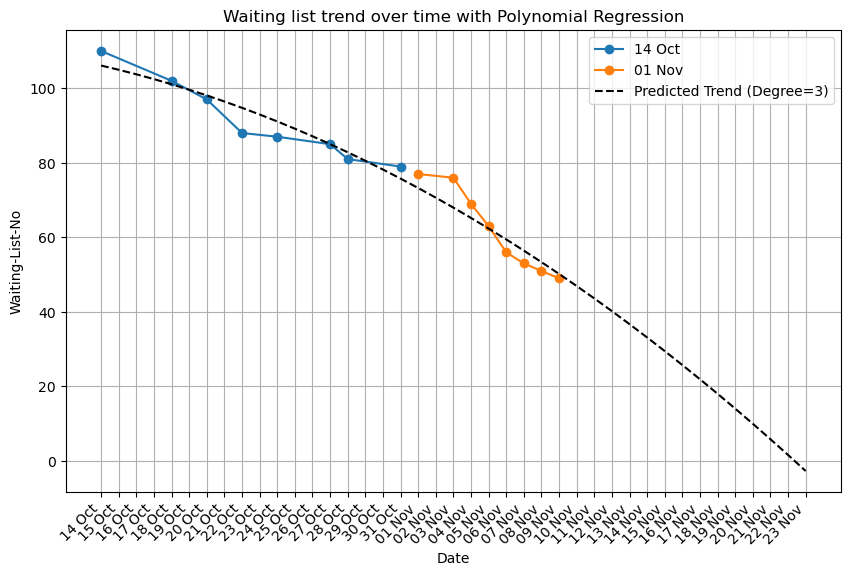

In [6]:
cmap = plt.get_cmap('tab10')
plt.figure(figsize=(10, 6))

df['DayOfMonth'] = df['Date'].dt.strftime('%d %b')
months = df['Date'].dt.month.unique()
for i, month in enumerate(months):
    subset = df[df['Date'].dt.month == month]
    if not subset.empty:
        label = subset['Date'].dt.strftime('%d %b').iloc[0]
        plt.plot(subset['Date'], subset['Waiting-List-No'], marker='o', label=label, color=cmap(i))

degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
X = df['Date'].apply(lambda date: date.toordinal()).values.reshape(-1, 1)
y = df['Waiting-List-No'].values
model.fit(X, y)


date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max() + pd.DateOffset(days=14)) 
X_pred = date_range.to_series().apply(lambda date: date.toordinal()).values.reshape(-1, 1)
y_pred = model.predict(X_pred)

new_data = {'Date':date_range,'Waiting-List-No':y_pred}
new_df = pd.DataFrame(new_data)
new_df['DayOfMonth'] = new_df['Date'].dt.strftime('%d %b')

plt.plot(date_range, y_pred, linestyle='--', label=f'Predicted Trend (Degree={degree})', color='black')


plt.xticks(new_df['Date'], new_df['DayOfMonth'], rotation=45, ha='right')
plt.title('Waiting list trend over time with Polynomial Regression')
plt.xlabel('Date')
plt.ylabel('Waiting-List-No')
plt.legend()
plt.grid(True)
plt.show()